# Caso 3

Caso 3 - MLP ( Optimizado: ADAM, f.costo: MSE, Epchos = 250, f.Activación: tangente hipervolica)

# Carga de librerias y datos

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

DATOS_MLP = 'https://drive.google.com/uc?id=1KNm2X0yZBMzC0bjuiDHoBshviNCB53mG'                        # Carga de datos para CASO 3 - MLP
df_mlp = pd.read_csv(DATOS_MLP)


# Analisis Exploratorio de datos - Caso 3

In [2]:
print('Cantidad de observaciones y caracteristicas : ', df_mlp.shape)
print('Caracteristicas : ', df_mlp.info())


Cantidad de observaciones y caracteristicas :  (20000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
Caracteristicas :  None


In [3]:
# Construccion de clases
# Clase 1 = Letras = J,O,H,A,N,M,T,R,Y,E,S
# Clase 2 = Letras = B,C,D,F,G,I,K,L,P,Q,U,V,W,X,Z

conditions = [
    (df_mlp['letter'] != 'J') & (df_mlp['letter'] != 'O') & (df_mlp['letter'] != 'H') & (df_mlp['letter'] != 'A') & (df_mlp['letter'] != 'N') &
    (df_mlp['letter'] != 'M') & (df_mlp['letter'] != 'T') & (df_mlp['letter'] != 'R') & (df_mlp['letter'] != 'Y') & (df_mlp['letter'] != 'E') &
    (df_mlp['letter'] != 'S'),]
choices = [-1]                                                                                                                                      # Clase -1 y 1 para utilizar funciones de activacion Tangente Hiperbolica.
df_mlp['clase'] = np.select(conditions, choices, default=1)


In [4]:
df_mlp = df_mlp.drop(columns=['letter'])

In [5]:
df_mlp.head(15)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,clase
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,1
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,-1
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,-1
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,1
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,-1
5,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,1
6,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,-1
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7,1
8,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7,1
9,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8,1


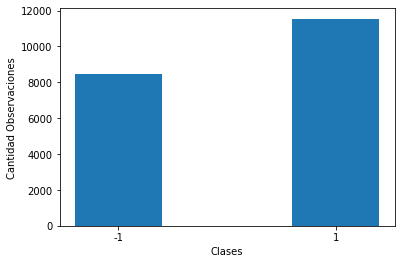

[ 1 -1]
[11546, 8454]


In [6]:
# Validacion balanceo entre clases. Por la cantidad de los datos se excluyen procesos de balanceo para este ejercicio.

x_values_mlp = df_mlp['clase'].unique()
y_values_mlp = df_mlp['clase'].value_counts().tolist()

plt.bar(x_values_mlp, y_values_mlp)
ax_mlp = plt.subplot()
ax_mlp.set_xticks(x_values_mlp)
ax_mlp.set_xticklabels(x_values_mlp)
ax_mlp.set_xlabel('Clases')
ax_mlp.set_ylabel('Cantidad Observaciones')
plt.show()

print(x_values_mlp)
print(y_values_mlp)

In [7]:
df_mlp_np = df_mlp.values

In [8]:
# Divisón caracteristicas y etiquetas

X = df_mlp_np[:,0:16]                                     # Extracción de caracteristicas
y = df_mlp_np[:,16]                                       # Extracción de etiquetas

print('Rango datos X : ', X.shape)
display(X)
print('Rando datos y : ', y.shape)
display(y)


Rango datos X :  (20000, 16)


array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]], dtype=int64)

Rando datos y :  (20000,)


array([ 1, -1, -1, ...,  1,  1,  1], dtype=int64)

# Division datos entrenamiento y prueba

Entrenamiento: 80%

Validación: 20%


In [9]:
# Cantidad de observaciones

print('Cantidad de observaciones totales : ', X.shape)
print('80% de datos para entrenamiento : ', (len(X)*0.8))
print('20% de datos para pruebas       : ', (len(X)*0.2))

Cantidad de observaciones totales :  (20000, 16)
80% de datos para entrenamiento :  16000.0
20% de datos para pruebas       :  4000.0


In [10]:
# la Libreria scikit-learn genera los datos aleatorios, garantizando que los conjunto sean excluyentes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)     # datos para prueba en X_test - y_test



In [11]:
print('Cantidad de datos entrenamiento : ', X_train.shape)
print('Cantidad de clase entrenamiento : ', y_train.shape)
print('Cantidad de datos prueba : ', X_test.shape)
print('Cantidad de clases prueba : ', y_test.shape)

Cantidad de datos entrenamiento :  (16000, 16)
Cantidad de clase entrenamiento :  (16000,)
Cantidad de datos prueba :  (4000, 16)
Cantidad de clases prueba :  (4000,)


# Modelos

In [13]:
# Definción del modelo

model_1 = Sequential([
    Dense(8, activation='relu', input_shape=(16,)),
    Dense(1, activation= 'tanh' )
])

model_2 = Sequential([
    Dense(16, activation='relu', input_shape=(16,)),
    Dense(1, activation= 'tanh' )
])

model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(16,)),
    Dense(1, activation= 'tanh' )
])

model_4 = Sequential([
    Dense(8, activation='relu', input_shape=(16,)),
    Dense(4, activation= 'relu' ),
    Dense(1, activation= 'tanh' )
])

model_5 = Sequential([
    Dense(16, activation='relu', input_shape=(16,)),
    Dense(8, activation= 'relu' ),
    Dense(1, activation= 'tanh' )
])

model_6 = Sequential([
    Dense(24, activation='relu', input_shape=(16,)),
    Dense(16, activation= 'relu' ),
    Dense(1, activation= 'tanh' )
])

In [14]:
# Optimizacion del modelo

model_1.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'],        
)

model_2.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'],        
)

model_3.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'],        
)

model_4.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'],        
)

model_5.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'],        
)

model_6.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'],        
)

In [15]:
# Entrenamiento

entrenamiento_1 = model_1.fit(X_train, y_train,
                            batch_size=32, epochs=250,
                           )

entrenamiento_2 = model_2.fit(X_train, y_train,
                            batch_size=32, epochs=250,
                           )

entrenamiento_3 = model_3.fit(X_train, y_train,
                            batch_size=32, epochs=250,
                           )

entrenamiento_4 = model_4.fit(X_train, y_train,
                            batch_size=32, epochs=250,
                           )

entrenamiento_5 = model_5.fit(X_train, y_train,
                            batch_size=32, epochs=250,
                           )

entrenamiento_6 = model_6.fit(X_train, y_train,
                            batch_size=32, epochs=250,
                           )


Epoch 1/250
500/500 [==============================] - 1s 970us/step - loss: 1.0971 - accuracy: 0.1026
Epoch 2/250
500/500 [==============================] - 0s 908us/step - loss: 0.9143 - accuracy: 0.0772
Epoch 3/250
500/500 [==============================] - 0s 979us/step - loss: 0.8282 - accuracy: 0.0651
Epoch 4/250
500/500 [==============================] - 0s 910us/step - loss: 0.7730 - accuracy: 0.0781
Epoch 5/250
500/500 [==============================] - 0s 814us/step - loss: 0.7433 - accuracy: 0.0941
Epoch 6/250
500/500 [==============================] - 1s 1ms/step - loss: 0.7222 - accuracy: 0.1096
Epoch 7/250
500/500 [==============================] - 1s 1ms/step - loss: 0.7035 - accuracy: 0.1191
Epoch 8/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6813 - accuracy: 0.1331
Epoch 9/250
500/500 [==============================] - 0s 939us/step - loss: 0.6658 - accuracy: 0.1444
Epoch 10/250
500/500 [==============================] - 0s 893us/step - loss: 0

In [16]:
print('modelo 1 : Exactitud = {}  Perdida = {}.2'.format(model_1.evaluate(X_test, y_test)[1], model_1.evaluate(X_test, y_test)[0]))
print('modelo 2 : Exactitud = {}  Perdida = {}.2'.format(model_2.evaluate(X_test, y_test)[1], model_2.evaluate(X_test, y_test)[0]))
print('modelo 3 : Exactitud = {}  Perdida = {}.2'.format(model_3.evaluate(X_test, y_test)[1], model_3.evaluate(X_test, y_test)[0]))
print('modelo 4 : Exactitud = {}  Perdida = {}.2'.format(model_4.evaluate(X_test, y_test)[1], model_4.evaluate(X_test, y_test)[0]))
print('modelo 5 : Exactitud = {}  Perdida = {}.2'.format(model_5.evaluate(X_test, y_test)[1], model_5.evaluate(X_test, y_test)[0]))
print('modelo 6 : Exactitud = {}  Perdida = {}.2'.format(model_6.evaluate(X_test, y_test)[1], model_6.evaluate(X_test, y_test)[0]))

125/125 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.2820
modelo 1 : Exactitud = 0.28200000524520874  Perdida = 0.4875037372112274.2
125/125 [==============================] - 0s 929us/step - loss: 0.3044 - accuracy: 0.3360
modelo 2 : Exactitud = 0.335999995470047  Perdida = 0.30439794063568115.2
125/125 [==============================] - 0s 827us/step - loss: 0.2596 - accuracy: 0.3640
modelo 3 : Exactitud = 0.36399999260902405  Perdida = 0.2596408724784851.2
125/125 [==============================] - 0s 768us/step - loss: 0.4179 - accuracy: 0.2752
modelo 4 : Exactitud = 0.27524998784065247  Perdida = 0.4179496765136719.2
125/125 [==============================] - 0s 766us/step - loss: 0.2235 - accuracy: 0.3455
modelo 5 : Exactitud = 0.34549999237060547  Perdida = 0.22346152365207672.2
125/125 [==============================] - 0s 809us/step - loss: 0.1621 - accuracy: 0.3855
modelo 6 : Exactitud = 0.3855000138282776  Perdida = 0.16205370426177979.2


# Conslusiones

- El modelo 3 presento mejores metricas de Exactitud y perdida, se pude deber a que tiene una mayor cantidad de neuronas en la capa oculta lo y no requiere aumentar la superficie de decision.